In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [64]:
# Load the dataset
df = pd.read_csv("D:\\Personal\\Codercave DS Intern\\climate_analysis\\daily_data.csv")

# Check the dimensions of the dataset
print("Dimensions of the dataset:", df.shape)

Dimensions of the dataset: (2668, 32)


In [65]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
       STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
0  72518014735  2015-01-01T23:59:00       SOD         6         PRECIP   
1  72518014735  2015-01-02T23:59:00       SOD         6         PRECIP   
2  72518014735  2015-01-03T23:59:00       SOD         6         PRECIP   
3  72518014735  2015-01-04T23:59:00       SOD         6         PRECIP   
4  72518014735  2015-01-05T23:59:00       SOD         6         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   
2              260         PLASTIC         42.6918        -73.83109   
3              260         PLASTIC         42.6918        -73.83109   
4              260         PLASTIC         42.6918        -73.83109   

       BackupName  ...  DailyPeakWindDirection  DailyPeakWindSpeed  \
0  NWS ALBANY, NY  ...     

In [66]:
# Check the data types and missing values
print("Information:")
print(df.info())
print("Missing values count:")
print(df.isnull().sum())

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   STATION                                     2668 non-null   int64  
 1   DATE                                        2668 non-null   object 
 2   REPORT_TYPE                                 2668 non-null   object 
 3   SOURCE                                      2668 non-null   int64  
 4   BackupElements                              2668 non-null   object 
 5   BackupElevation                             2668 non-null   int64  
 6   BackupEquipment                             2668 non-null   object 
 7   BackupLatitude                              2668 non-null   float64
 8   BackupLongitude                             2668 non-null   float64
 9   BackupName                                  2668 non-null   object 
 10 

In [67]:
print("Summary of dataset")
print(df.describe())

Summary of dataset
            STATION  SOURCE  BackupElevation  BackupLatitude  BackupLongitude  \
count  2.668000e+03  2668.0           2668.0     2668.000000      2668.000000   
mean   7.251801e+10     6.0            260.0       42.689750       -73.828268   
std    0.000000e+00     0.0              0.0        0.004187         0.005764   
min    7.251801e+10     6.0            260.0       42.681200       -73.831090   
25%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
50%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
75%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
max    7.251801e+10     6.0            260.0       42.691800       -73.816500   

       DailyAverageDewPointTemperature  DailyAverageDryBulbTemperature  \
count                      2668.000000                     2668.000000   
mean                         38.217766                       50.107571   
std                          

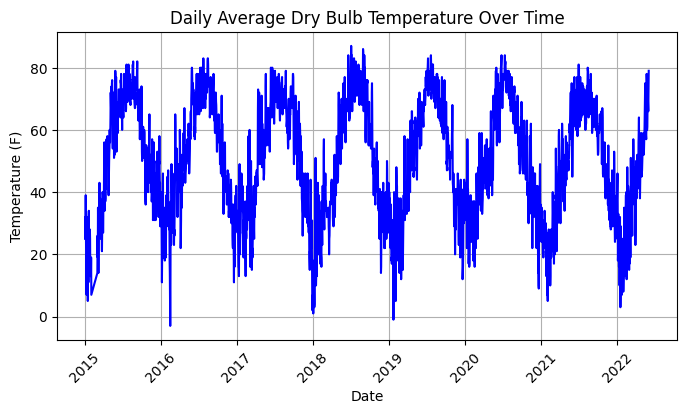

In [68]:
# Convert DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Plotting chart1: DailyAverageDryBulbTemperature
plt.figure(figsize=(8, 4))
plt.plot(df['DATE'], df['DailyAverageDryBulbTemperature'], color='blue')
plt.title('Daily Average Dry Bulb Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

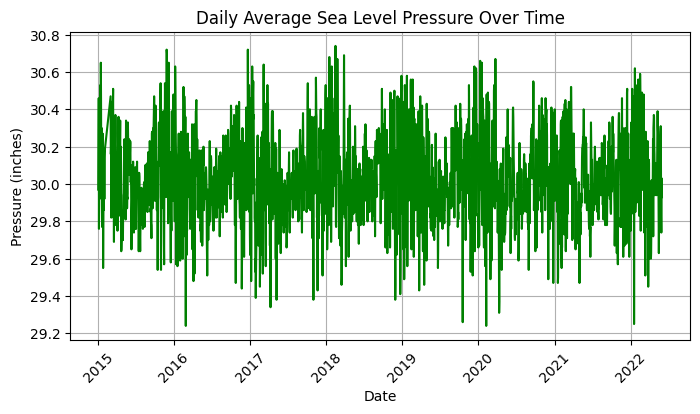

In [69]:
# Plotting chart2: DailyAverageSeaLevelPressure
plt.figure(figsize=(8, 4))
plt.plot(df['DATE'], df['DailyAverageSeaLevelPressure'], color='green')
plt.title('Daily Average Sea Level Pressure Over Time')
plt.xlabel('Date')
plt.ylabel('Pressure (inches)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

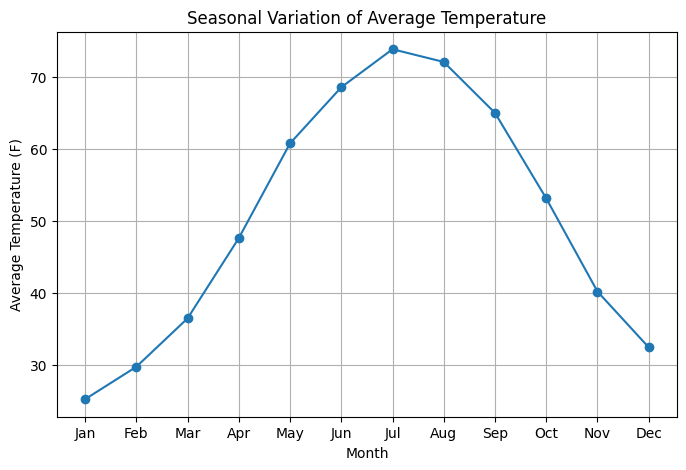

In [70]:
# Extract month and year from the date
df['Month'] = df['DATE'].dt.month
df['Year'] = df['DATE'].dt.year

# Group by month and calculate the average temperature for each month
monthly_avg_temp = df.groupby(['Month'])['DailyAverageDryBulbTemperature'].mean()

# Plot the seasonal variation of temperature
plt.figure(figsize=(8, 5))
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o', linestyle='-')
plt.title('Seasonal Variation of Average Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature (F)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

C:\Users\karni\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karni\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karni\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karni\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

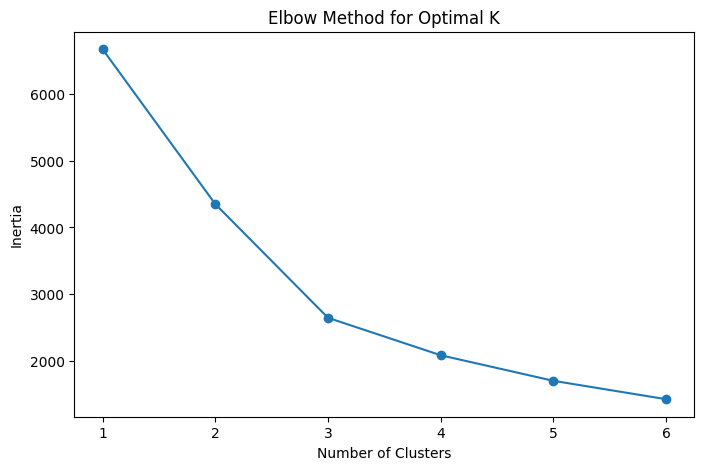

In [71]:
# Select features for PCA
features_for_pca = ['DailyAverageDryBulbTemperature', 'DailyAverageSeaLevelPressure', 'DailyAverageWindSpeed']

# Standardize the features
scaled_features = df[features_for_pca]
scaled_features = (scaled_features - scaled_features.mean()) / scaled_features.std()

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame for principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot PCA: Elbow plot
inertia = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(principal_df)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 7), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\karni\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


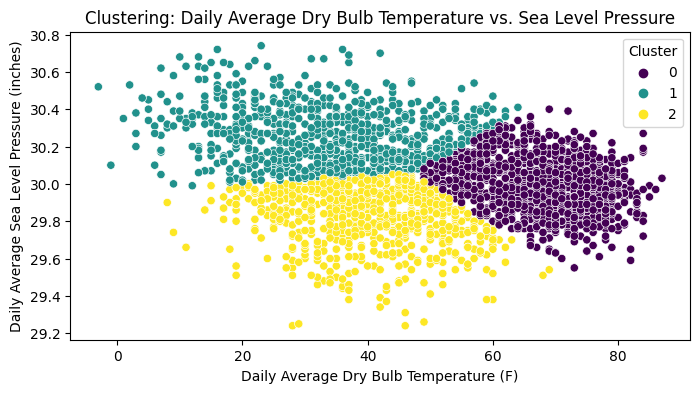

In [72]:
# Select features for clustering
features_for_clustering = ['DailyAverageDryBulbTemperature', 'DailyAverageSeaLevelPressure']

# Standardize the features
scaled_features = df[features_for_clustering]
scaled_features = (scaled_features - scaled_features.mean()) / scaled_features.std()

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Plot clusters
plt.figure(figsize=(8, 4))
sns.scatterplot(x='DailyAverageDryBulbTemperature', y='DailyAverageSeaLevelPressure', hue='Cluster', data=df, palette='viridis')
plt.title('Clustering: Daily Average Dry Bulb Temperature vs. Sea Level Pressure')
plt.xlabel('Daily Average Dry Bulb Temperature (F)')
plt.ylabel('Daily Average Sea Level Pressure (inches)')
plt.show()

In [73]:
# Count of clusters
cluster_count = df['Cluster'].value_counts()
print("Count of clusters:")
print(cluster_count)

Count of clusters:
0    1132
1     826
2     710
Name: Cluster, dtype: int64


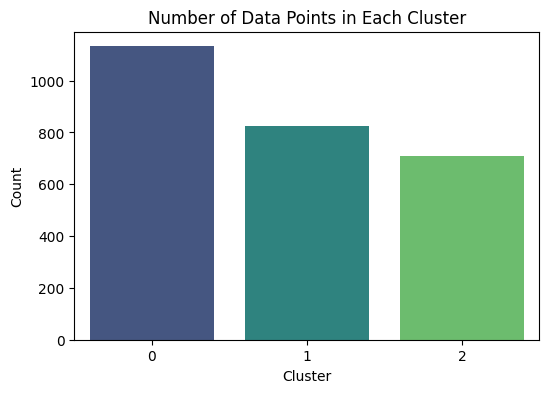

In [74]:
# Plot number of clusters
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Number of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

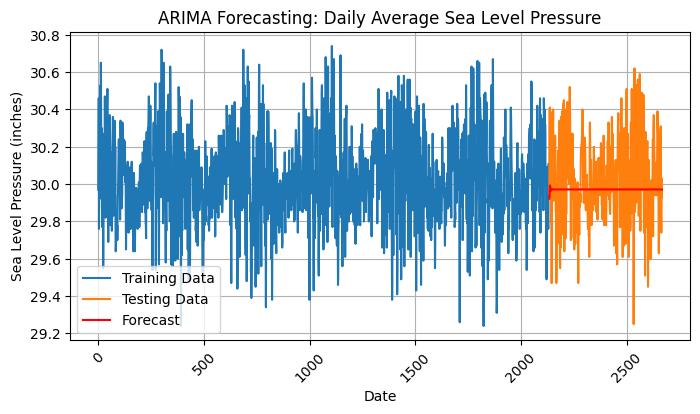

In [75]:
# Select the column to be predicted (DailyAverageSeaLevelPressure)
sea_level_pressure = df['DailyAverageSeaLevelPressure']

# Split the data into training and testing sets
train_size = int(len(sea_level_pressure) * 0.8)
train_data, test_data = sea_level_pressure[:train_size], sea_level_pressure[train_size:]

# Fit ARIMA model
model = ARIMA(train_data, order=(5,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test_data))

# Plot actual vs forecasted values
plt.figure(figsize=(8, 4))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Testing Data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecasting: Daily Average Sea Level Pressure')
plt.xlabel('Date')
plt.ylabel('Sea Level Pressure (inches)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

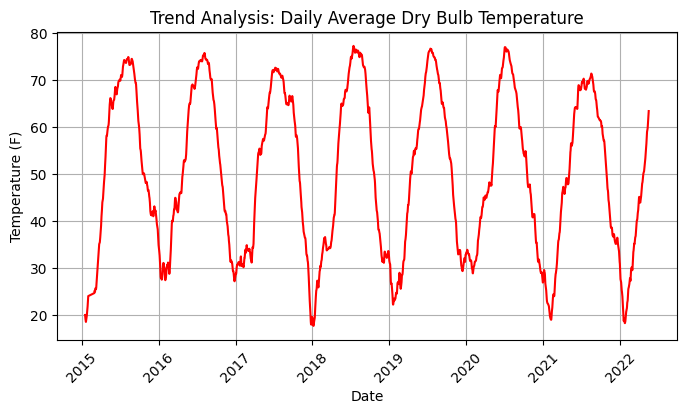

In [76]:
# Trend analysis for a particular temperature column
temperature_column = 'DailyAverageDryBulbTemperature'
decomposition = seasonal_decompose(df[temperature_column], period=30)
trend = decomposition.trend

# Plot trend analysis
plt.figure(figsize=(8, 4))
plt.plot(df['DATE'], trend, color='red')
plt.title('Trend Analysis: Daily Average Dry Bulb Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()